# Example of Clustering Validation using External Measures
In this example, we apply hierarchical clustering to the input variables of the Iris dataset. Then, we compare the labels assigned by the clustering with the known labels.

We begin by importing the needed libraries.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

We load the Iris data set and print some statistics.

In [13]:
iris = datasets.load_iris()
target = np.array(iris.target)

print("Number of examples: ", iris.data.shape[0])
print("Number of variables:", iris.data.shape[0])
print("Variable names:     ", iris.feature_names)
print("Target values:      ", iris.target_names)
print("Class Distribution  ", [(x,sum(target==x)) for x in np.unique(target)])

Number of examples:  150
Number of variables: 150
Variable names:      ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target values:       ['setosa' 'versicolor' 'virginica']
Class Distribution   [(0, 50), (1, 50), (2, 50)]


We apply hierarchical clustering using single linkage. Given that there are 150 cases, we have 149 merges.

In [15]:
merges = linkage(iris.data, method = 'single')
print('there have been %d merges'%(merges.shape[0]))

there have been 149 merges


Let's plot the dendrogram which shows two major clusters: a smaller one (in green) and a larger one.

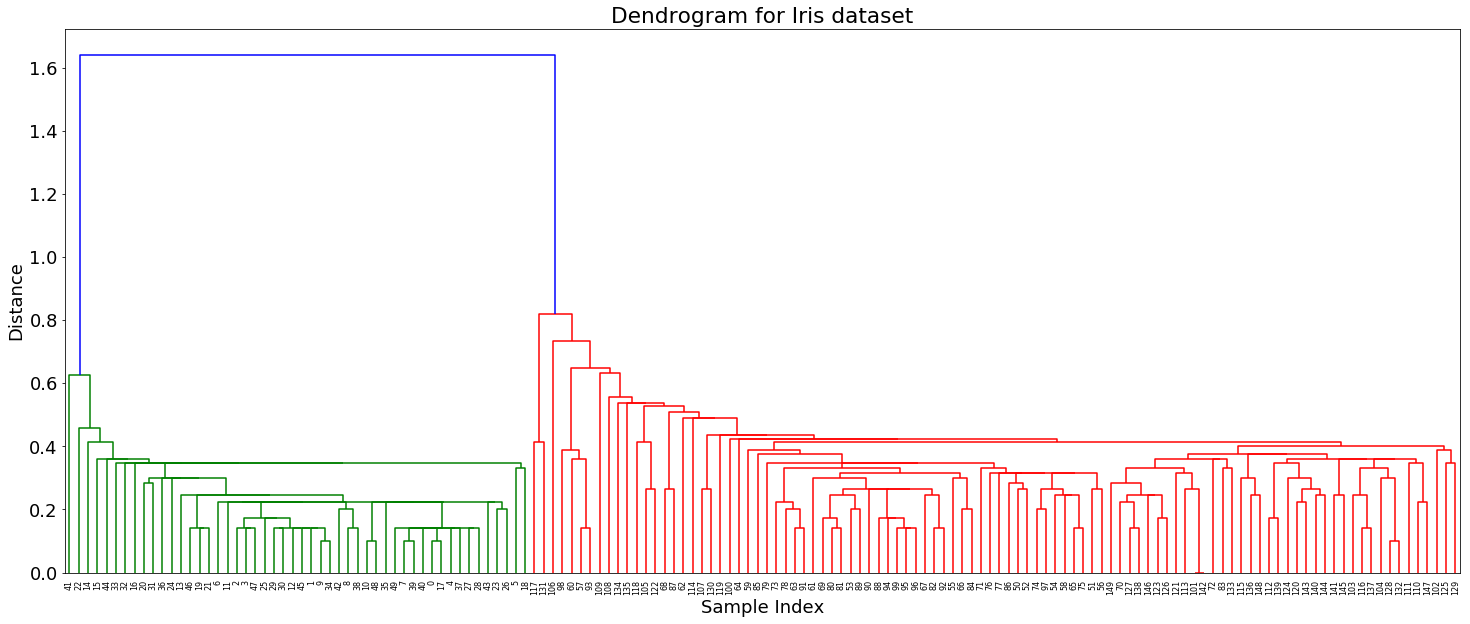

In [35]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(merges, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Dendrogram for Iris dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Let's check the solution with three clusters and build a table that report the distribution of original labels in each one of the three clusters.

In [37]:
labels = fcluster(merges,3,criterion='maxclust')
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': iris.target_names[target]})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Print the table
print(ct)

varieties  setosa  versicolor  virginica
labels                                  
1              50           0          0
2               0           0          2
3               0          50         48


Note that cluster 1 perfectly identifies all the examples labeled as "setosa", Cluster 2 contains just two examples (labeled "virginica"), while Cluster 3 contains all the remaining cases.

What happens when we use complete linkage or average linkage?

In [41]:
# Repeats the analysis using complete linkage

merges = linkage(iris.data, method = 'complete')
labels = fcluster(merges,3,criterion='maxclust')
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': iris.target_names[target]})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Print the table
print(ct)

varieties  setosa  versicolor  virginica
labels                                  
1               0          23         49
2               0          27          1
3              50           0          0


In [45]:
# Repeats the analysis using complete linkage

merges = linkage(iris.data, method = 'average')
labels = fcluster(merges,3,criterion='maxclust')
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': iris.target_names[target]})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Print the table
print(ct)

varieties  setosa  versicolor  virginica
labels                                  
1              50           0          0
2               0           0         36
3               0          50         14
